In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv
/kaggle/input/book-recommendation-dataset/recsys_taxonomy2.png


In [2]:
# read files

books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')
ratings = pd.read_csv('/kaggle/input/book-recommendation-dataset/Ratings.csv')
user = pd.read_csv('/kaggle/input/book-recommendation-dataset/Users.csv')

/tmp/ipykernel_19/2602210328.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(books.shape,user.shape,ratings.shape)

(271360, 8) (278858, 3) (1149780, 3)


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
# droping unwanted columns.

newdf = books.merge(ratings,on='ISBN')
newdf.drop(columns=['ISBN','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M'],inplace =True)
newdf

,Book-Title,Book-Author,Image-URL-L,User-ID,Book-Rating
0,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0
1,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
2,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...
1031131,There's a Bat in Bunk Five,Paula Danziger,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,From One to One Hundred,Teri Sloat,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,Republic (World's Classics),Plato,http://images.amazon.com/images/P/0192126040.0...,276680,0


# collaborative Filtering Based Recommender System

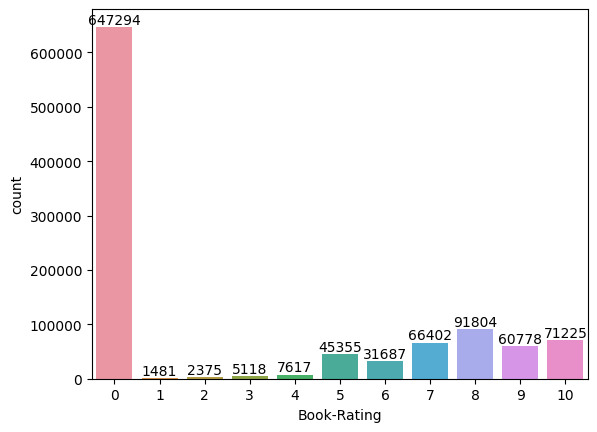

In [11]:
import seaborn as sns
ax = sns.countplot(newdf,x=newdf['Book-Rating'])
for i in ax.containers:
    ax.bar_label(i)

In [12]:
# Extract the user ids who have given more than 150 ratings

indx = newdf.groupby('User-ID').count()['Book-Rating']>150
indx = indx[indx].index

In [13]:
# final filtered data that who have given more than 150 ratings

data_filter = newdf[newdf['User-ID'].isin(indx)]

In [14]:
# Extract books that have received more than 50 ratings

index_50 = data_filter.groupby('Book-Title').count()['Book-Rating']>=50
rated_books = index_50[index_50].index

In [15]:
# final data books that have received more than 50 ratings

rated_books = data_filter[data_filter['Book-Title'].isin(rated_books)]

In [16]:
# Create pivot table for cosine cosine_similarity

final_dt = rated_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [17]:
final_dt.fillna(0,inplace = True)
final_dt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# find euclidian distance

from sklearn.metrics.pairwise import cosine_similarity
score_sim = cosine_similarity(final_dt)
score_sim.shape

(868, 868)

In [19]:
score_sim

array([[1.        , 0.07980265, 0.00974903, ..., 0.09658948, 0.06448266,
        0.03549567],
       [0.07980265, 1.        , 0.25233692, ..., 0.06000464, 0.14873547,
        0.1435961 ],
       [0.00974903, 0.25233692, 1.        , ..., 0.03769791, 0.04493654,
        0.09205667],
       ...,
       [0.09658948, 0.06000464, 0.03769791, ..., 1.        , 0.06439035,
        0.01670749],
       [0.06448266, 0.14873547, 0.04493654, ..., 0.06439035, 1.        ,
        0.09936127],
       [0.03549567, 0.1435961 , 0.09205667, ..., 0.01670749, 0.09936127,
        1.        ]])

In [20]:
# Helper function to find recommend books

def recommed(obj):
    index = np.where(final_dt.index == obj)[0][0]
    similar_items = sorted(list(enumerate(score_sim[index])),key=lambda x:x[1],reverse=True)[1:8]
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == final_dt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [21]:
recommed('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.MZZZZZZZ.jpg'],
 ["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
  'Kurt Vonnegut',
  'http://images.amazon.com/images/P/0440180295.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
  'Stefan Fatsis',
  'http://images.amazon.com/images/P/0142002267.01.MZZZZZZZ.jpg']]